In [16]:
import psycopg2
import os

conn = psycopg2.connect(os.environ['DATABASE_URL'])
cur = conn.cursor()

cur.execute('SELECT COUNT(*) FROM "Post";')
print('Total posts: %d' % cur.fetchone())

cur.execute('SELECT COUNT(*) FROM "User";')
print('Total users: %d' % cur.fetchone()) 

Total posts: 285
Total users: 510


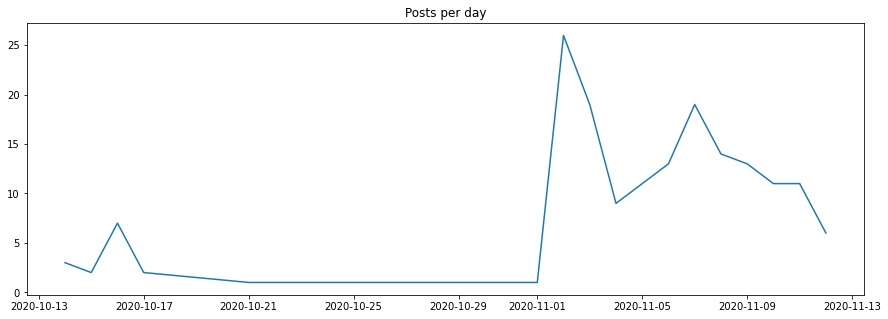

In [17]:
import psycopg2
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

conn = psycopg2.connect(os.environ['DATABASE_URL'])
cur = conn.cursor()

cur.execute('''
    SELECT "createdAt"::DATE as date, COUNT(*) FROM "Post"
    WHERE "Post"."createdAt" > %s
    GROUP BY date
    ORDER BY date;
''', (datetime.utcnow() - timedelta(days=30),))
rows = cur.fetchall()

dates = [row[0] for row in rows]
post_counts = [row[1] for row in rows]

plt.title('Posts per day')
plt.rcParams['figure.figsize'] = [15, 5]
plt.plot(dates, post_counts)